In [50]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd

In [67]:
model = KNeighborsRegressor(n_neighbors=4)
# model = LinearRegression()

In [52]:
pipe = Pipeline([
      ("scale", StandardScaler()),
      ("model", KNeighborsRegressor(n_neighbors=1))  
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [53]:
data = load_boston(return_X_y=True)

In [54]:
X, y = data

In [55]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [68]:
model.fit(X, y)

KNeighborsRegressor(n_neighbors=4)

In [69]:
pred = model.predict(X)

In [71]:
pred = pipe.predict(X)

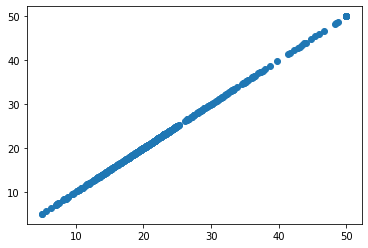

In [72]:
plt.scatter(pred, y)

In [77]:
gs_model = GridSearchCV(estimator = pipe,
            param_grid = {'model__n_neighbors' : range(1, 11)}, 
            cv = 3
            )

In [78]:
gs_model.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': range(1, 11)})

In [79]:
rs = pd.DataFrame(gs_model.cv_results_)
rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001331,4.692359e-04,0.001662,4.723380e-04,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001665,4.708117e-04,0.001662,4.716390e-04,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001318,4.554715e-04,0.001661,4.693475e-04,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000997,1.123916e-07,0.001994,1.946680e-07,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.000998,2.973602e-07,0.001995,1.123916e-07,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000997,1.123916e-07,0.000998,0.000000e+00,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000997,1.123916e-07,0.001995,1.123916e-07,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001662,4.700217e-04,0.001330,4.700779e-04,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000998,1.946680e-07,0.001994,2.247832e-07,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000998,7.867412e-07,0.001662,4.699093e-04,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
